# Beer Advocate Review Challenge Report

## Written by Hao Zhu

First, do some preparation. Import needed library, CSV file and, transform into DataFrame.

Do some simple data cleaning, drop N/A value in the CSV file.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import seaborn
import math

In [2]:
df = pd.read_csv('beer_reviews.csv')
df = df.dropna()
df

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
0,10325,Vecchio Birraio,1234817823,1.5,2.0,2.5,stcules,Hefeweizen,1.5,1.5,Sausa Weizen,5.0,47986
1,10325,Vecchio Birraio,1235915097,3.0,2.5,3.0,stcules,English Strong Ale,3.0,3.0,Red Moon,6.2,48213
2,10325,Vecchio Birraio,1235916604,3.0,2.5,3.0,stcules,Foreign / Export Stout,3.0,3.0,Black Horse Black Beer,6.5,48215
3,10325,Vecchio Birraio,1234725145,3.0,3.0,3.5,stcules,German Pilsener,2.5,3.0,Sausa Pils,5.0,47969
4,1075,Caldera Brewing Company,1293735206,4.0,4.5,4.0,johnmichaelsen,American Double / Imperial IPA,4.0,4.5,Cauldron DIPA,7.7,64883
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1586609,14359,The Defiant Brewing Company,1162684892,5.0,4.0,3.5,maddogruss,Pumpkin Ale,4.0,4.0,The Horseman's Ale,5.2,33061
1586610,14359,The Defiant Brewing Company,1161048566,4.0,5.0,2.5,yelterdow,Pumpkin Ale,2.0,4.0,The Horseman's Ale,5.2,33061
1586611,14359,The Defiant Brewing Company,1160702513,4.5,3.5,3.0,TongoRad,Pumpkin Ale,3.5,4.0,The Horseman's Ale,5.2,33061
1586612,14359,The Defiant Brewing Company,1160023044,4.0,4.5,4.5,dherling,Pumpkin Ale,4.5,4.5,The Horseman's Ale,5.2,33061


### Question1: Which brewery produces the strongest beers by ABV%?

For this question, first I choose to sort the datasets by value of beer_abv column to see the highset ABV% beer and the brewery it belongs to.

In [3]:
df_abv = df.sort_values(by=['beer_abv'], ascending=False)
df_abv

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
12919,6513,Schorschbräu,1316780901,4.0,4.0,4.0,kappldav123,Eisbock,4.0,3.5,Schorschbräu Schorschbock 57%,57.70,73368
12940,6513,Schorschbräu,1274469798,3.5,4.0,4.0,kappldav123,Eisbock,4.0,4.5,Schorschbräu Schorschbock 43%,43.00,57856
12939,6513,Schorschbräu,1309974178,4.0,4.0,3.5,Sunnanek,Eisbock,4.0,4.0,Schorschbräu Schorschbock 43%,43.00,57856
746352,16315,BrewDog,1314318595,2.0,2.0,4.0,feylure,American Double / Imperial IPA,2.0,2.0,Sink The Bismarck!,41.00,57015
746346,16315,BrewDog,1319851388,2.5,2.5,2.5,MsRif,American Double / Imperial IPA,2.0,2.5,Sink The Bismarck!,41.00,57015
...,...,...,...,...,...,...,...,...,...,...,...,...,...
795876,187,Brouwerij Lindemans,1237419992,2.5,3.5,4.0,RblWthACoz,Lambic - Fruit,3.5,3.0,Lindemans Chello,0.01,48553
274913,2444,Companhia Cervejaria Brahma,1146516834,1.5,1.5,2.0,schiaveto,Low Alcohol Beer,1.5,1.0,Liber,0.01,20210
795875,187,Brouwerij Lindemans,1242330385,5.0,2.5,4.5,Floydster,Lambic - Fruit,3.0,3.5,Lindemans Chello,0.01,48553
274912,2444,Companhia Cervejaria Brahma,1260126065,1.0,1.0,3.0,DoubleJ,Low Alcohol Beer,2.0,1.0,Liber,0.01,20210


As the data frame shows, the three highsest ABV% beers are both from the brewery Schorschbräu.

I also choose to calculate the averay beers' ABV% for each brewery to verify the answer I have got.

In [4]:
df[['brewery_id', 'brewery_name', 'beer_abv']].groupby(['brewery_id', 'brewery_name']).mean().sort_values(by=['beer_abv'], ascending=False)

,,beer_abv
brewery_id,brewery_name,
6513,Schorschbräu,19.228824
14060,Shoes Brewery,15.200000
2873,Rome Brewing Company,13.840000
736,Hurlimann Brewery,13.750000
10038,Alt-Oberurseler Brauhaus,13.200000
...,...,...
2349,"Cerveceria Vegana, S.A.",2.260870
23305,Moskovskaya Pivovarennaya Kompaniya,2.150000
19144,Fentimans Ltd.,1.375000


The top brewery of this table is still Schorschbräu which has an average of 19.23 ABV% for the beers it produced.

In conclusion, Schorschbräu produces the strongest beers by ABV%.

### Question2: If you had to pick 3 beers to recommend using only this data, which would you pick?

For this question, I decide to build up a simple recommendation system by use K-means clustering to divide review people in diffrent groups.

For example, there are 1000 diffferent types of beers and 500 people have tasted all of them and give each one a score to assess its quality. What I want to do is divide those 500 people in different groups where people in same group tend to have a more similar taste and favor on beers. So, those like-minded people are more likely to have common favorite beers.

When I need to pick 3 beers to recommend to someone, I would ask him some questions about beers to identify which group he is better fit in and then recommend 3 highest scores beers that group people averagely scored.

In this general question, I make an assumption that the person I need to recommend to never taste any beers before, so his overall scores to all kinds of beers in this dataset are set to 0.

Next step is model set up. There are lots of people only give one review and lots of beers only get one review in this dataset. In order to set up a common recommendation system, those kinds of records are not representative. So, I choose to set up two thresholds corresponding to number of reviews the beer type has received and number of reviews one person has given. If the certain beer type or person do not meet the thresholds, I will remove their rows.

Set the threshold for beer type. Too many beer types will increase the dimension of datasets which is not good for Kmeans clustering. So here I choose 1000 reviews one beer type received as the threshold. The total number of beer types stayed is 199.

In [5]:
df_beer_filter = df['beer_beerid'].value_counts()
df_beer_filter_idx = df_beer_filter[df_beer_filter>1000].index
df_beer_filter[df_beer_filter>1000]

2093     3289
412      3110
1904     2999
1093     2727
4083     2702
         ... 
7520     1011
386      1011
199      1006
1658     1003
37477    1002
Name: beer_beerid, Length: 199, dtype: int64

Set the threshold for person review. Too many review persons will increase the number of records in datasets which is not good for Kmeans clustering. So here I choose 200 reviews one person has given as the threshold. The total number of review persons stayed is 1823.

In [6]:
df_user_filter = df['review_profilename'].value_counts()
df_user_filter_idx = df_user_filter[df_user_filter>200].index
df_user_filter[df_user_filter>200]

northyorksammy    5346
mikesgroove       4283
BuckeyeNation     4246
Thorpe429         3273
brentk56          3186
                  ... 
JayNH              201
terrabyte          201
chilly460          201
Cavery             201
br3wmeister        201
Name: review_profilename, Length: 1823, dtype: int64

After filtering, get a new dataset.

In [7]:
df_beer = df[df['beer_beerid'].isin(df_beer_filter_idx)]
df_beer_user = df_beer[df_beer['review_profilename'].isin(df_user_filter_idx)].sort_values(by=['beer_beerid'])
df_beer_user

,brewery_id,brewery_name,review_time,review_overall,review_aroma,review_appearance,review_profilename,beer_style,review_palate,review_taste,beer_name,beer_abv,beer_beerid
377365,22,Unibroue,1283973688,4.0,3.5,4.5,Pencible,Belgian Strong Dark Ale,4.0,3.5,Trois Pistoles,9.0,30
377968,22,Unibroue,1212542107,4.0,3.5,4.0,homebrewhawk,Belgian Strong Dark Ale,4.0,3.5,Trois Pistoles,9.0,30
377966,22,Unibroue,1213506239,4.0,4.5,3.5,ChainGangGuy,Belgian Strong Dark Ale,4.0,4.5,Trois Pistoles,9.0,30
377964,22,Unibroue,1213593139,4.5,4.5,3.5,spointon,Belgian Strong Dark Ale,4.5,4.5,Trois Pistoles,9.0,30
377963,22,Unibroue,1213857114,4.0,4.0,4.0,roadhouse,Belgian Strong Dark Ale,4.5,4.5,Trois Pistoles,9.0,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...
505660,132,Rogue Ales,1284692694,3.0,3.5,4.0,comfortablynumb1,Oatmeal Stout,3.0,3.0,Shakespeare Oatmeal Stout,6.1,56973
505659,132,Rogue Ales,1284775824,2.5,3.0,3.5,jrallen34,Oatmeal Stout,4.5,3.0,Shakespeare Oatmeal Stout,6.1,56973
505657,132,Rogue Ales,1284786084,4.0,4.0,4.0,rtepiak,Oatmeal Stout,4.0,4.0,Shakespeare Oatmeal Stout,6.1,56973
505654,132,Rogue Ales,1284938484,3.0,4.0,3.0,SolomonGrundy,Oatmeal Stout,3.0,4.5,Shakespeare Oatmeal Stout,6.1,56973


Get the beer_id list and review_user_name list without duplicates.

In [8]:
beer_list = df_beer_user['beer_beerid'].drop_duplicates()
user_list = df_beer_user['review_profilename'].drop_duplicates()

In [9]:
beer_list

377365        30
374320        33
372034        34
1340149       39
1218692       59
           ...  
161536     43687
285047     47785
70217      48434
307468     54904
505127     56973
Name: beer_beerid, Length: 199, dtype: int64

In [10]:
user_list

377365           Pencible
377968       homebrewhawk
377966       ChainGangGuy
377964           spointon
377963          roadhouse
                ...      
340676            rudylaw
1558426    BigMcLargeHuge
1551711              Klym
1491185           crusian
782091      CharlesDarwin
Name: review_profilename, Length: 1823, dtype: object

Set up a new table with each user's overall review scores to each different beer.

If one user does not have given reviews to a certain kind of beers, I set the overall score as 0. If one user has two reviews to the one kind of beers, I will average the two overall scores to get the final single score.

In [11]:
score_table = []
num = 0
for i in user_list:
    num = num + 1
    if num % 200 == 0:
        print('Have processed ',num, ' times.')
    m = []
    for j in beer_list:
        df_try = df_beer_user[(df_beer_user['beer_beerid'] == j) & (df_beer_user['review_profilename'] == i)]
        if df_try.empty:
            m.append(0)
        else:
            m.append(df_try['review_overall'].mean())
    score_table.append(m)

score_tabledf = pd.DataFrame(score_table)
score_tabledf

Have processed  200  times.
Have processed  400  times.
Have processed  600  times.
Have processed  800  times.
Have processed  1000  times.
Have processed  1200  times.
Have processed  1400  times.
Have processed  1600  times.
Have processed  1800  times.


,0,1,2,3,4,5,6,7,8,9,...,189,190,191,192,193,194,195,196,197,198
0,4.0,3.5,3.5,4.5,0.0,0.0,2.5,0.0,4.5,4.5,...,0.0,3.5,4.5,4.5,4.00,3.5,4.0,0.0,4.5,4.5
1,4.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,3.5,4.0,0.0,4.50,3.5,0.0,4.5,4.5,0.0
2,4.0,3.5,3.5,0.0,3.5,4.0,3.5,0.0,4.5,4.5,...,3.0,5.0,3.5,4.5,4.00,4.0,4.0,4.5,4.0,4.0
3,4.5,5.0,5.0,5.0,4.5,4.5,4.5,4.0,0.0,4.5,...,4.0,4.5,0.0,3.5,4.75,4.5,0.0,4.5,0.0,0.0
4,4.0,4.5,4.5,5.0,4.5,4.5,4.0,0.0,3.0,4.5,...,4.0,3.0,0.0,4.0,4.00,1.0,3.5,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1818,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,4.0,0.00,0.0,0.0,0.0,0.0,0.0
1819,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1820,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0
1821,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.00,0.0,0.0,0.0,0.0,0.0


Use elboow method to decide the appropriate number of clustering

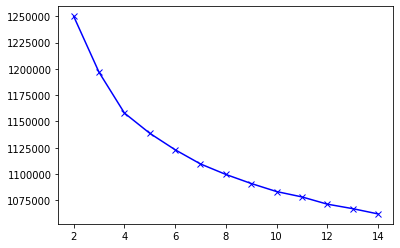

In [12]:
distortions = []
K = range(2,15)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(score_tabledf)
    distortions.append(kmeanModel.inertia_)
plt.plot(K, distortions, 'bx-')

From the plot, choose 4 as number of clustering. Next, train the k-means model.

In [13]:
kmeans = KMeans(n_clusters=4, random_state=0).fit(score_tabledf)

Use the assumption I have mentioned at the beginning of this question. Here use the 199 * 1 [0, ..., 0] to represent the person who have never tasted any beers before. Use the model I have trained to predict this person belonging to which group.

In [14]:
kmeans.predict(np.zeros(199).reshape(1, -1))

array([1])

The result shows that the person belongs to group 1. Calculate the average scores group 1 people give to each beer. Get the top 3 beers group 1 people scored.

In [15]:
count = 0
re = np.zeros(199)
for index, i  in enumerate(score_table):
    if list(kmeans.labels_)[index] == 1:
        count = count + 1
        re = re + np.array(i)
re_mean = re / count
re_mean

array([1.36444008, 1.40078585, 1.77210216, 0.75343811, 0.75638507,
       0.87475442, 1.49263261, 0.65471513, 1.50556647, 1.12770138,
       1.0348723 , 1.24901768, 0.73280943, 1.26817289, 1.00196464,
       1.01915521, 1.81286837, 0.54125737, 1.51866405, 1.40275049,
       1.26375246, 0.89390963, 0.98280943, 0.88408644, 0.70383104,
       0.4867387 , 0.67288802, 1.20972495, 0.92141454, 1.57760314,
       1.05058939, 0.51620825, 0.70104781, 1.35363458, 1.51129666,
       0.67632613, 0.67141454, 0.87033399, 0.71316306, 0.41928618,
       0.77848723, 1.456778  , 0.65422397, 0.80599214, 0.97495088,
       0.71905697, 1.65127701, 1.08497053, 0.94302554, 1.49803536,
       0.80255403, 1.09332024, 0.82514735, 0.48379175, 0.81532417,
       1.0780943 , 0.57416503, 1.02554028, 1.38015717, 1.09037328,
       0.60903733, 0.88948919, 0.98821218, 1.26227898, 0.8870334 ,
       1.3953831 , 0.83104126, 1.68958743, 0.68614931, 1.37082515,
       1.30288147, 1.05795678, 0.78732809, 0.48330059, 0.69253

In [16]:
sorted( [(x,i) for (i,x) in enumerate(list(re_mean))], reverse=True )[:3]

[(1.8128683693516698, 16), (1.7824165029469548, 114), (1.7721021611001964, 2)]

The 3 highest average overall scores are very low because the person who have never drunk beers before is belonging to the users who give the smallest reviews. In this group, people have different favors and favorites. So the average score for a certain kind of beer will be lower compared to other groups.

It might not be so scientific. If I apply this recommend system to the real-world, I would see the feedback on people who have been predicted in this group. If this group's 3 highest average overall scores beers are not typical, I would choose to use the highest average overall score among users who have give more than 200 reviews. This method will be more general, however, make less conspicuous mistakes.

In [17]:
df_beer_user[df_beer_user['beer_beerid'] == beer_list.iloc[2]].iloc[0]

brewery_id                         22
brewery_name                 Unibroue
review_time                1169789065
review_overall                      5
review_aroma                        5
review_appearance                   4
review_profilename         WetCoaster
beer_style                     Tripel
review_palate                     4.5
review_taste                        4
beer_name             La Fin Du Monde
beer_abv                            9
beer_beerid                        34
Name: 372034, dtype: object

In [18]:
df_beer_user[df_beer_user['beer_beerid'] == beer_list.iloc[16]].iloc[0]

brewery_id                                            35
brewery_name          Boston Beer Company (Samuel Adams)
review_time                                   1230241745
review_overall                                         5
review_aroma                                           4
review_appearance                                    4.5
review_profilename                          sonicdescent
beer_style                                  Vienna Lager
review_palate                                        4.5
review_taste                                         4.5
beer_name                      Samuel Adams Boston Lager
beer_abv                                             4.9
beer_beerid                                          104
Name: 280718, dtype: object

In [19]:
df_beer_user[df_beer_user['beer_beerid'] == beer_list.iloc[67]].iloc[0]

brewery_id                                    222
brewery_name          Brouwerij Duvel Moortgat NV
review_time                            1036937502
review_overall                                  5
review_aroma                                    4
review_appearance                             4.5
review_profilename                      bditty187
beer_style                Belgian Strong Pale Ale
review_palate                                   5
review_taste                                    5
beer_name                                   Duvel
beer_abv                                      8.5
beer_beerid                                   695
Name: 970716, dtype: object

From the final result, three beers recommended to the people who have never drunk before are 'La Fin Du Monde', 'Samuel Adams Boston Lager' and 'Duvel'. 

### Question3: Which of the factors (aroma, taste, appearance, palette) are most important in determining the overall quality of a beer?

To view this question purely over the data, what I need to compare is the correlation between the review_overall and the other four review scores. First, I consider to use the correlation matrix and covariance matrix to show the correlation between variables.

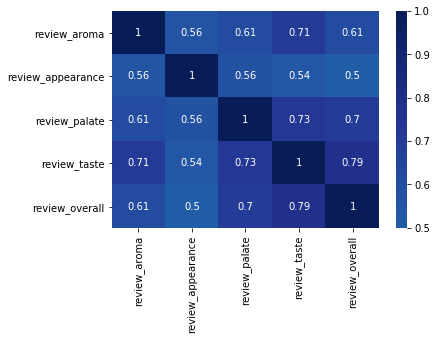

In [20]:
df_review = df[['review_aroma', 'review_appearance', 'review_palate', 'review_taste', 'review_overall']]
df_review_corr = df_review.corr()
seaborn.heatmap(df_review_corr, center=0, annot=True, cmap='YlGnBu')

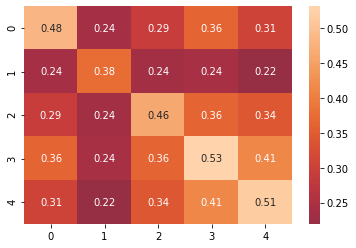

In [21]:
matrix_review = np.array(df_review)
covariance_matrix_review = np.cov(matrix_review.T)
seaborn.heatmap(covariance_matrix_review, center=0, annot=True)

The results of the two matrices are highly similar. The relevance to review_overall is sorted from high to low as taste, palate, aroma and appearance. Of course, aroma and appearance are also important parameters, because they also have a high correlation with taste and palate.

In order to better verify the results, a classification method is used to evaluate the importance of these discrete features -- random forest. The principle of random forest verifying feature importance is that for each decision tree in the random forest, use the corresponding OOB (out of bag data) or Gini index to calculate its out of bag data error. If some noise is added randomly to a feature, the error rate is greatly increased, which means that this feature has a great influence on the classification results of the sample, that is to say, its importance is relatively high. So I built a random forest to verify the importance of features.

In [22]:
x_train,x_test,y_train,y_test=train_test_split(df[['review_aroma', 'review_appearance', 'review_palate', 'review_taste']],df['review_overall'],test_size=0.3,random_state=22)
forest=RandomForestClassifier(n_estimators=10,n_jobs=-1,random_state=9)
forest.fit(x_train * 10,y_train * 10)

features = np.array(['review_aroma', 'review_appearance', 'review_palate', 'review_taste'])
importances=forest.feature_importances_
important = np.vstack((features,importances))
print('the importance of the features：\n',important)
rank = important[:,important[1].argsort()]
rank = rank.T[::-1]
for i in range(len(rank)):
    print(i+1,':', rank[i,0])


the importance of the features：
 [['review_aroma' 'review_appearance' 'review_palate' 'review_taste']
 ['0.08197485875230064' '0.03693665300916763' '0.2796413636847973'
  '0.6014471245537344']]
1 : review_taste
2 : review_palate
3 : review_aroma
4 : review_appearance


So, the importance of features that determine the overall quality can rank as:

1 : review_taste

2 : review_palate

3 : review_aroma

4 : review_appearance

This is consistent with the result of the matrices.

### Question4: Lastly, if I typically enjoy a beer due to its aroma and appearance, which beer style should I try?

For this question, the beers which have received less than 50 reviews are not under my consideration because they are lack of review information and not representative.

Aggregate the review_aroma scores and review_appearance scores by beer_style to see the different beer styles' benchmarks.

In [23]:
df_beerstyle_filt = df['beer_beerid'].value_counts()
df_beerstyle_filt_idx = df_beerstyle_filt[df_beerstyle_filt>50].index
df_beerstyle = df[df['beer_beerid'].isin(df_beerstyle_filt_idx)]
beerstyle = df_beerstyle[['beer_style', 'review_aroma', 'review_appearance']]
beerstyle_description = beerstyle.groupby('beer_style').describe()
beerstyle_description

review_aroma                                     \
                                  count      mean       std  min  25%  50%   
beer_style                                                                   
Altbier                          5046.0  3.641795  0.579771  1.0  3.5  3.5   
American Adjunct Lager          23284.0  2.462592  0.707211  1.0  2.0  2.5   
American Amber / Red Ale        32403.0  3.701864  0.603638  1.0  3.5  4.0   
American Amber / Red Lager       7345.0  3.222328  0.644171  1.0  3.0  3.0   
American Barleywine             22328.0  4.032650  0.511182  1.0  4.0  4.0   
...                                 ...       ...       ...  ...  ...  ...   
Vienna Lager                     7105.0  3.465447  0.606455  1.0  3.0  3.5   
Weizenbock                       7928.0  4.080222  0.498260  1.0  4.0  4.0   
Wheatwine                        2964.0  3.987179  0.517175  1.0  3.5  4.0   
Winter Warmer                   16984.0  3.702514  0.602928  1.0  3.5  4.0   
Witbier                         23455.0  3.656832  0.610441  1.0  3.5  3.5   

                                     review_appearance                      \
                            75%  max             count      mean       std   
beer_style                                                                   
Altbier                     4.0  5.0            5046.0  3.811336  0.514679   
American Adjunct Lager      3.0  5.0           23284.0  2.765612  0.729825   
American Amber / Red Ale    4.0  5.0           32403.0  3.863963  0.525471   
American Amber / Red Lager  3.5  5.0            7345.0  3.540231  0.603623   
American Barleywine         4.5  5.0           22328.0  4.057439  0.472876   
...                         ...  ...               ...       ...       ...   
Vienna Lager                4.0  5.0            7105.0  3.725053  0.557269   
Weizenbock                  4.5  5.0            7928.0  4.040300  0.498816   
Wheatwine                   4.5  5.0            2964.0  3.904015  0.473725   
Winter Warmer               4.0  5.0           16984.0  3.851654  0.509464   
Witbier                     4.0  5.0           23455.0  3.706544  0.573373   

                                                     
                            min  25%  50%  75%  max  
beer_style                                           
Altbier                     1.0  3.5  4.0  4.0  5.0  
American Adjunct Lager      1.0  2.0  3.0  3.0  5.0  
American Amber / Red Ale    1.0  3.5  4.0  4.0  5.0  
American Amber / Red Lager  1.0  3.0  3.5  4.0  5.0  
American Barleywine         1.0  4.0  4.0  4.5  5.0  
...                         ...  ...  ...  ...  ...  
Vienna Lager                1.0  3.5  4.0  4.0  5.0  
Weizenbock                  1.0  4.0  4.0  4.5  5.0  
Wheatwine                   1.0  3.5  4.0  4.0  5.0  
Winter Warmer               1.0  3.5  4.0  4.0  5.0  
Witbier                     1.0  3.5  4.0  4.0  5.0  

[103 rows x 16 columns]

In [24]:
beerstyle_mean_scores = beerstyle.groupby('beer_style').mean()
aroma = beerstyle_mean_scores.sort_values(by = ['review_aroma'], ascending=False)
aroma

,review_aroma,review_appearance
beer_style,,
Eisbock,4.187608,3.960924
American Double / Imperial Stout,4.176260,4.180169
American Wild Ale,4.162917,4.039281
Quadrupel (Quad),4.145206,4.134077
Gueuze,4.138511,4.059681
...,...,...
Japanese Rice Lager,2.606825,2.965504
American Adjunct Lager,2.462592,2.765612
American Malt Liquor,2.422465,2.836603


Table shows the top average aroma scores beer styles.

In [25]:
beerstyle_mean_scores = beerstyle.groupby('beer_style').mean()
appearance = beerstyle_mean_scores.sort_values(by = ['review_appearance'], ascending=False)
appearance

,review_aroma,review_appearance
beer_style,,
Russian Imperial Stout,4.085416,4.225372
American Double / Imperial Stout,4.176260,4.180169
Quadrupel (Quad),4.145206,4.134077
American Black Ale,3.938245,4.128796
Belgian IPA,3.992181,4.092835
...,...,...
Japanese Rice Lager,2.606825,2.965504
Low Alcohol Beer,2.398618,2.884793
American Malt Liquor,2.422465,2.836603


Table shows the top average appearance scores beer styles.

Because the question does not mention the weight of aroma and appearance, so here I use the 50% and 50% to calculate the final scores to assess the best beer styles by aroma and appearance.

In [26]:
beerstyle_mean_scores['total_average'] = 0
beerstyle_mean_scores['total_average'] = (beerstyle_mean_scores['review_aroma'] + beerstyle_mean_scores['review_appearance'])
beerstyle_mean_scores = beerstyle_mean_scores.sort_values(by = ['total_average'], ascending=False)
beerstyle_mean_scores

,review_aroma,review_appearance,total_average
beer_style,,,
American Double / Imperial Stout,4.176260,4.180169,8.356428
Russian Imperial Stout,4.085416,4.225372,8.310789
Quadrupel (Quad),4.145206,4.134077,8.279283
American Double / Imperial IPA,4.117551,4.092569,8.210120
American Wild Ale,4.162917,4.039281,8.202198
...,...,...,...
Japanese Rice Lager,2.606825,2.965504,5.572329
Low Alcohol Beer,2.398618,2.884793,5.283410
American Malt Liquor,2.422465,2.836603,5.259067
